# Properties of Convolution

A linear system's characteristics are completely specified by the system's impulse response, as governed by the mathematics of convolution. This is the basis of many signal processing
techniques. For example: Digital filters are created by *designing* an appropriate impulse response. Enemy aircraft are detected with radar by *analyzing* a measured impulse response. Echo suppression in long distance telephone calls is accomplished by creating an impulse response that *counteracts* the impulse response of the reverberation.

## Common Impulse Responses

### Delta Function

Identity:
$$x[n]*d[n] = x[n]$$ 

Amplification/Attenuation:
$$ x[n]*kd[n] = kx[n]$$

Shifting:
$$x[n]*d[n+s] = x[n+s]$$

Science and engineering are filled with cases where one signal is a shifted version of another. For example, consider a radio signal transmitted from a remote space probe, and the corresponding signal received on the earth. The time it takes the radio wave to propagate over the distance causes a delay between the transmitted and received signals. In biology, the electrical signals in adjacent nerve cells are shifted versions of each other, as determined by the time it takes an action potential to cross the synaptic junction that connects the two.

### Calculus-like Operation

The discrete operation the mimics the first derivative is called the *first difference*. Likewise, the discrete form of the integral is called the *running sum*.

These impulse responses are simple enough that a full convolution program is usually not needed to implement them. Rather, think of them in the alternative mode: each sample in the output signal is a sum of weighted samples from the input. 

For instance, they can be calculated as follows:

First Difference:
$$y[n]=x[n]-x[n-1]$$

Running Sum:
$$y[n]=x[n]+y[n-1]$$

The impulse response are:


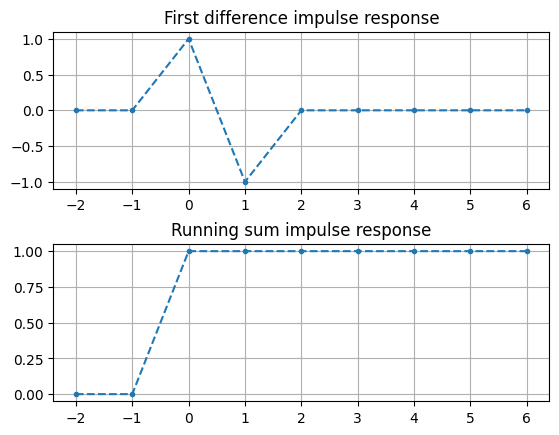

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

first_diff_impulse = np.array([0,0,1,-1,0,0,0,0,0])
running_sum_impulse = np.array([0,0,1,1,1,1,1,1,1])

fig, ax = plt.subplots(2)
plt.subplots_adjust(hspace = 0.35)
plt.figure()
ax[0].grid(True)
ax[0].title.set_text("First difference impulse response")
ax[0].plot(np.arange(-2,7), first_diff_impulse, ".--")
ax[1].grid(True)
ax[1].title.set_text("Running sum impulse response")
ax[1].plot(np.arange(-2,7), running_sum_impulse, ".--")
plt.show()

### Low-pass & High-pass Filters

The design of digital filters is covered in later chapters. For now, the general shapes of low-pass and high-pass *filter kernels* will be discussed. **In general, low-pass filter kernels are composed of a group of *adjacent positive points***. This results in each sample in the output signal being a weighted average of many adjacent points from the input signal. This averaging smoothes the signal, thereby removing high-frequency components. 

Some low-pass filter kernels include a few negative valued samples in the tails, such as the Sinc function. Just as in analog electronics, digital low-pass filters are used for noise reduction, signal separation, wave shaping, etc.

The cutoff frequency of the filter is changed by making filter kernel wider or narrower. **If a low-pass filter has a gain of one at DC (zero frequency), then the sum of all of the points in the impulse response must be equal to one.**

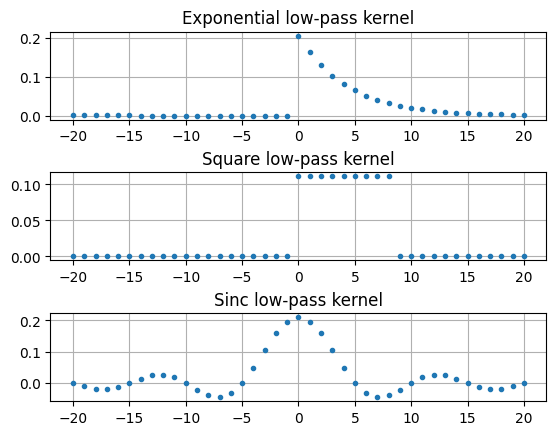

<Figure size 640x480 with 0 Axes>

In [14]:
x = np.arange(-20,21)

# trapz() used to normalize area under curve to 1

# Create exponential impulse
tau = -(len(x)-1) / np.log(0.0001)
LP_exp_kernel = np.roll(signal.exponential(len(x), 0, tau, False), len(x)//2)
LP_exp_kernel /= np.trapz(LP_exp_kernel)

# Create square impulse
LP_square_kernel = np.hstack( (np.zeros(20), np.ones(9), np.zeros(12)) )
LP_square_kernel /= np.trapz(LP_square_kernel)

# Create sinc kernel
LP_sinc_kernel = np.sinc(np.linspace(-4, 4, 41))
LP_sinc_kernel /= np.trapz(LP_sinc_kernel)

fig, ax = plt.subplots(3)
plt.subplots_adjust(hspace = 0.6)
plt.figure()
ax[0].grid(True)
ax[0].title.set_text("Exponential low-pass kernel")
ax[0].plot(x, LP_exp_kernel, ".")
ax[1].grid(True)
ax[1].title.set_text("Square low-pass kernel")
ax[1].plot(x, LP_square_kernel, ".")
ax[2].grid(True)
ax[2].title.set_text("Sinc low-pass kernel")
ax[2].plot(x, LP_sinc_kernel, ".")
plt.show()

High-pass filters are derived from the corresponding low-pass filter kernels. This is a common strategy in filter design: first devise a low-pass filter and then transform it to what you
need, high-pass, band-pass, band-reject, etc. To understand the low-pass to high-pass transform, remember that a delta function impulse response passes the entire signal, while a low-pass impulse response passes only the low-frequency components. By superposition, a filter kernel consisting of a delta function minus the low-pass filter kernel will pass the entire signal minus the
low-frequency components. A high-pass filter is born! **The delta function is usually added at the center of symmetry, or sample zero if the filter kernel is not symmetrical. High-pass filters have zero gain at DC (zero frequency), achieved by making the sum of all the points in the filter kernel equal to zero.**

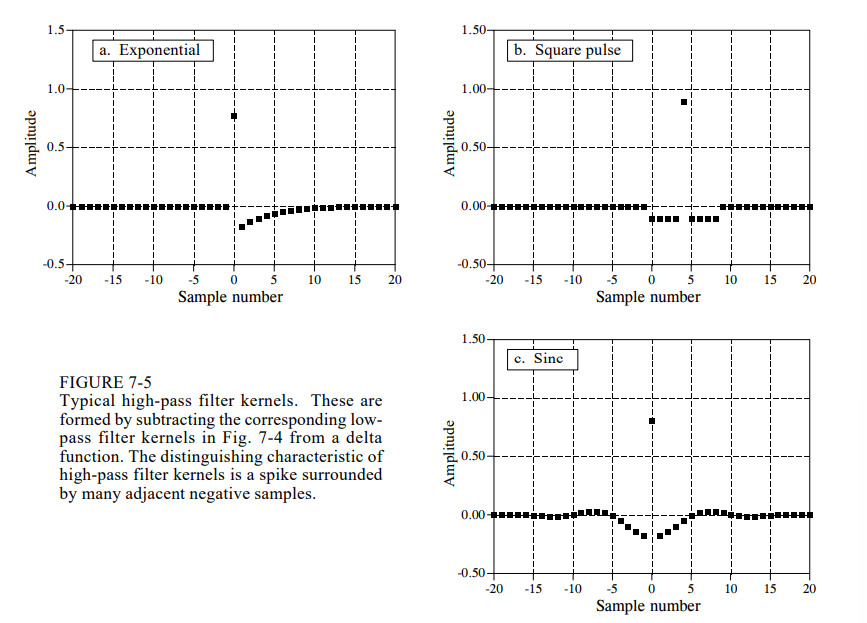